# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  

Необходимо провести исследовательский анализ данных и установить параметры, влияющие на цену объектов.


### Общая информация о наборе данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
pd.set_option('display.max_columns', None)

df.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

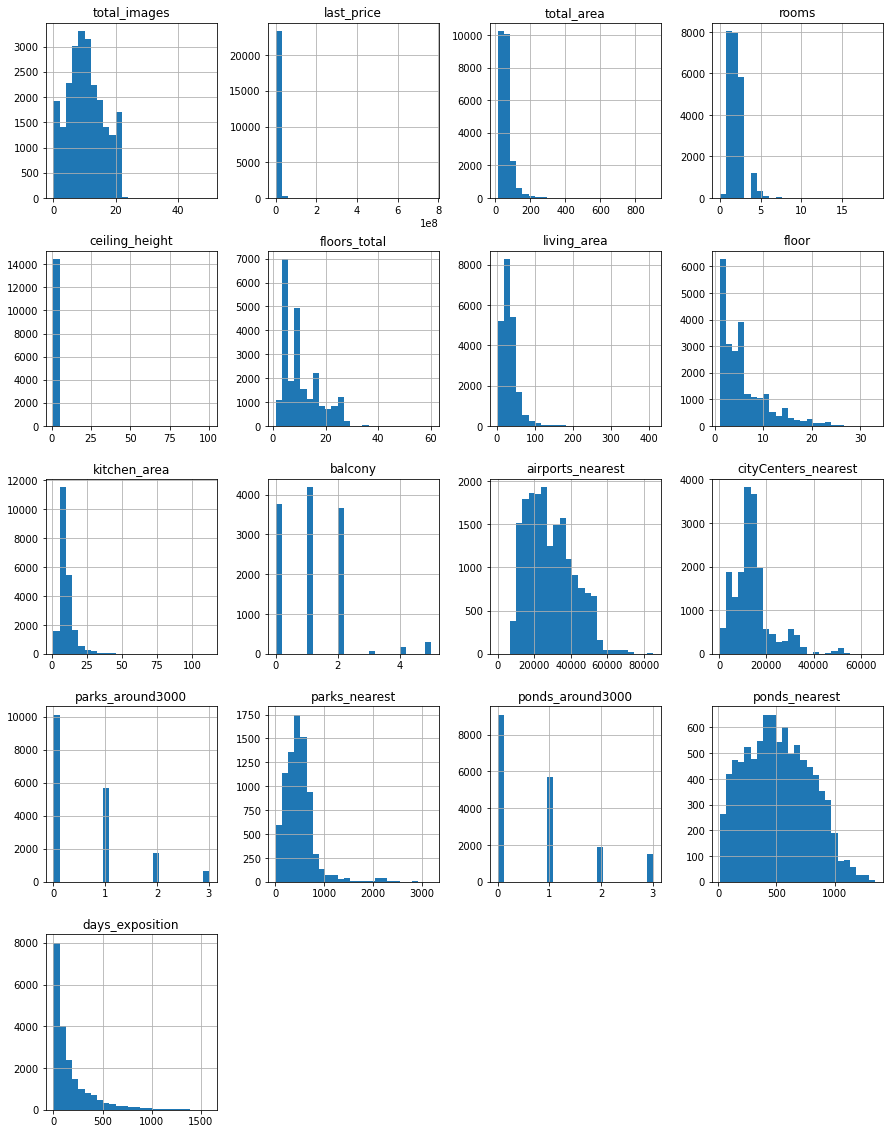

In [ ]:
df.hist(figsize=(15, 20), bins=25);

In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Распределения имеют длиные хвосты, а средние значения по многим признакам отличаются от медиан, что свидетельсвует о наличии в выборке аномальных значений.

### Предобработка данных

In [ ]:
# Приведем наименований признаков к удобной форме
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [ ]:
# Определим доли пропущенных значений для каждого признака
df.isna().sum().sort_values(ascending=False)/len(df)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Признак "is_apartment" на 88,3% состоит из пропущенных значений. Так как данный стобец датафрейма содержит лишь значения True и False, вероятно, пропуски соответствуют значению False (т.е. квартира не является апартаментами).  
Признак "balcony", 48,6% которого составляют пропущенные значения, отражает количество балконов. Можно предположить, что NaN эквивалентен отсутствию балкона в квартире, и заменить на 0.  
Признаки "parks_nearest" (65,9% пропущеных значений), "ponds_nearest" (61,6%), "city_centers_nearest" (23,3%), "airports_nearest" (23,4%), "ponds_around3000 (23,3%)" и "parks_around3000" (23,3%) содержат существенное количество выбросов, при этом восстановить значения без точного адреса не удастся. Так как эти данные были автоматически получены из геосервисов, причиной пропусков могли стать технические проблемы.  
Пропущенные значения в "ceiling_height" могут быть обусловлены тем, что некоторые владельцы квартир не знают высоту потолков в квартире. Так как NaN составляют 38,8% значений признака, замена пропусков может привести к искажению результатов исследования, поэтому оставим их без изменения.  
"kitchen_area", "living_area" могут содержать пропуски, например, если квартира является студией и сложно выделить жилую площадь и площадь кухни.  
Так как пропуски в столбцах "floors_total" (3,6%) и "locality_name" (2,1%) встречаются редко, можно предположить, что они носят случайный характер. Возможно, пользователи по какой-то причине пропускали эти поля.


In [ ]:
# Восстановим пропущенные значения там, где это возможно
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony']  = df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# Изменим типы данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['is_apartment'] = df['is_apartment'].astype(bool)
df['balcony'] = df['balcony'].astype(int)

Был изменен тип данных в переменных "is_apartment" и "balcony", в которых ранее запонялись пропущенные значения, а также в переменной "first_day_exposition" для дальнейшей работы с признаком (разделения его на составные части: день, месяц и год публикации)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [ ]:
# Просмотрим уникальные значения названий населённых пунктов для выявления дубликатов
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Встречаются дубликаты двух видов:  
- "поселок Аннино" и "посёлок Аннино", отличающиеся лишь буквами "е" и "ё",
- "поселок городского типа Павлово" и "село Павлово", отличающиеся формулировкой типа населенного пункта.

In [ ]:
# Заменим "ё" на "е"
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [ ]:
# Зададим функцию для выделения типа населённого пункта в отдельный столбец
def locality_type(row):
  try:
    if 'городской поселок' in row or 'поселок городского типа' in row:
      return 'поселок городского типа'
    elif 'коттеджный поселок' in row:
      return 'коттеджный поселок'
    elif 'садоводческое некоммерческое товарищество' in row or 'садовое товарищество' in row:
      return 'садоводческое товарищество'
    elif 'поселок станции' in row or 'поселок при железнодорожной станции' in row:
      return 'поселок при ж\д станции'
    elif 'поселок' in row:
      return 'поселок'
    elif 'деревня' in row:
      return 'деревня'
    elif 'село' in row:
      return 'село'
  except:
    return None

In [ ]:
# Создадим столбец, применив функцию
df['locality_type'] = df['locality_name'].apply(locality_type)

In [ ]:
# Оставим в locality_name только названия населенных пунктов
prefixes = ['городской поселок ',
            'поселок городского типа ',
            'коттеджный поселок ',
            'поселок при железнодорожной станции ',
            'поселок станции ',
            'садоводческое некоммерческое товарищество ',
            'садовое товарищество ',
            'деревня ', 'село ', 'поселок ']

for prefix in prefixes:
    df['locality_name'] = df['locality_name'].str.replace(prefix, '')

In [ ]:
# Убедимся, что дубликаты устранены
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [ ]:
df.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,None
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,None
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,None
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,None
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,поселок городского типа
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,поселок
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,None
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,поселок
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,None


### Новые столбцы

In [ ]:
# Цена за квадратный метр
df['price_m2'] = df['last_price'] / df['total_area']
# День публикации
df['day_exposition'] = df['first_day_exposition'].dt.weekday
# Месяц публикации
df['month_exposition'] = df['first_day_exposition'].dt.month
# Год публикации
df['year_exposition'] = df['first_day_exposition'].dt.year
# Расстояние до центра города в км.
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000)

In [ ]:
# Функция для определения типа этажа
def categorize_floor(row):
  floor = row['floor']
  total_floor = row['floors_total']
  try:
    if floor == 1:
      return 'первый'
    elif floor == total_floor:
      return 'последний'
    elif 1 < floor < total_floor:
      return 'другой'
  except:
    pass

In [ ]:
df['floor_type'] = df.apply(categorize_floor, axis=1)

In [ ]:
df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,price_m2,day_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,None,120370.370370,3,3,2019,16.0,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,None,92785.714286,3,8,2015,14.0,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,None,408176.100629,4,7,2015,7.0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,None,100000.000000,1,6,2018,8.0,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,поселок городского типа,95065.789474,0,9,2018,NaN,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,поселок,99195.710456,3,11,2017,19.0,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,None,110544.692737,3,4,2019,12.0,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,поселок,87454.764777,2,5,2018,NaN,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,None,88524.590164,6,2,2017,15.0,другой


### Исследовательский анализ данных

В данных много выбросов, построим гистрограммы отдельно для каждого столбца, исключив аномальные значения.

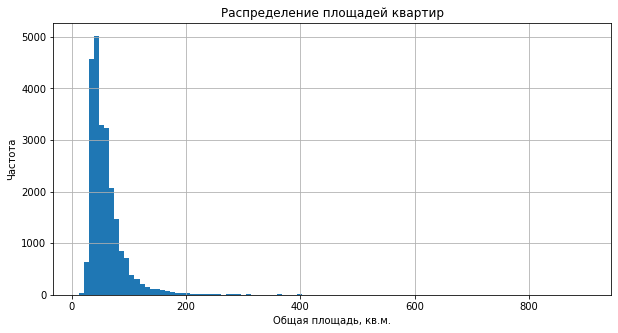

In [ ]:
df.hist('total_area', bins=100, figsize=(10,5))
plt.title('Распределение площадей квартир')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Частота')
plt.show()

In [ ]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Распределение имеет длинный хвост, основная масса наблюдений находится в диапазоне до 200 кв.м., а максимальное значение составляет 900 кв.м. и более чем в 10 раз превышает значение третьего квартиля (69,9), что свидетельствует о наличии выбросов.  

Построим диаграмму размаха, чтобы определить, какую площадь можно считать аномально большой.

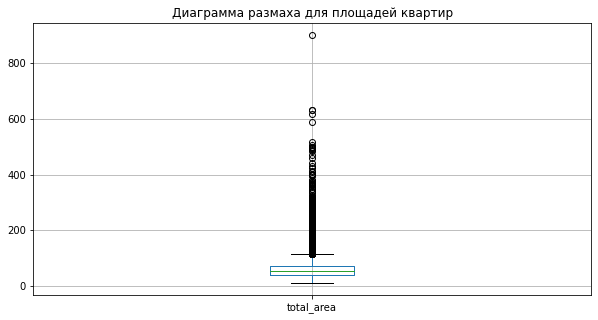

In [ ]:
df.boxplot('total_area', figsize=(10,5))
plt.title('Диаграмма размаха для площадей квартир')
plt.show()

In [ ]:
print('Доля квартир с общей площадью меньше 15 кв.м. или больше 200 кв.м.:',
      round(sum((df['total_area'] > 200)|(df['total_area'] < 15))/(df['total_area'].count()),3))

Доля квартир с общей площадью меньше 15 кв.м. или больше 200 кв.м.: 0.01


Квартиры, общая площадь которых меньше 15 кв.м. или больше 200 кв.м., составляют 1% датасета, отбросим эти значения как редко встречающиеся.

In [ ]:
df_good = df.query('total_area >= 15 and total_area <= 200').reset_index(drop=True)
df_good['total_area'].describe()

count    23466.000000
mean        58.191344
std         26.525475
min         15.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64

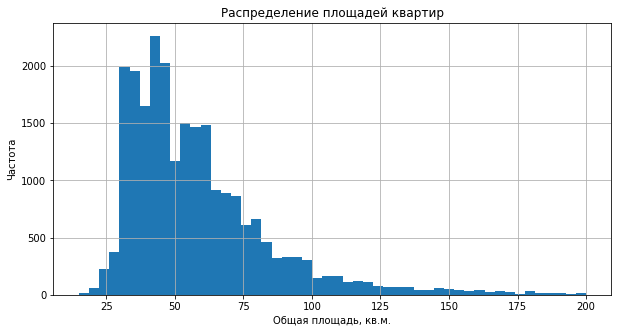

In [ ]:
df_good.hist('total_area', bins=50, figsize=(10,5))
plt.title('Распределение площадей квартир')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Частота')
plt.show()

Большая часть квартир имеет общую площадь 40-50 кв.м., следующая по количеству объявлений категория квартир - 30-40 кв.м., третья - 50-60. Средняя площадь составляет 58,19 кв.м., при этом площадь 50% квартир не превышает 52 кв.м.

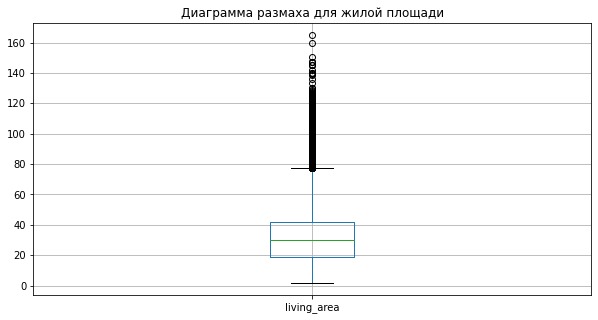

In [ ]:
# Рассмотрим жилую площадь квартир
df_good.boxplot('living_area', figsize=(10,5))
plt.title('Диаграмма размаха для жилой площади')
plt.show()

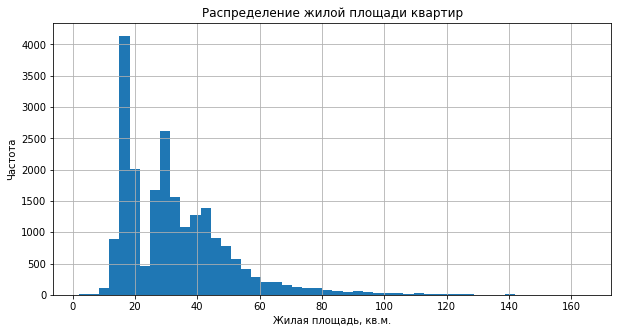

In [ ]:
# Построим гистограмму
df_good.hist('living_area', bins=50, figsize=(10,5))
plt.title('Распределение жилой площади квартир')
plt.xlabel('Жилая площадь, кв.м.')
plt.ylabel('Частота')
plt.show()

Распределение имеет два пика:
- 15-20 м^2  
- 25-35 м^2

Можно предположить, что в интервал 15-20 кв.м. жилой площади попадают студии и однокомнатные квартиры, а в диапазон 25-35 кв.м. двухкомнатные и трёхкомнатные.

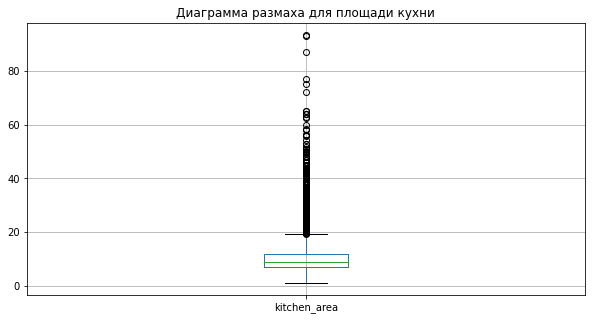

In [ ]:
# Проанализируем площадь кухни
df_good.query('kitchen_area < 100').boxplot('kitchen_area', figsize=(10,5))
plt.title('Диаграмма размаха для площади кухни')
plt.show()

In [ ]:
df_good['kitchen_area'].describe()

count    21222.000000
mean        10.387107
std          5.371638
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

Проверим, какая площадь кухни указана для студий и квартир с открытой планировкой:

In [ ]:
df_good[df_good['studio'] == True]['kitchen_area'].unique()

array([nan])

In [ ]:
df_good[df_good['open_plan'] == True]['kitchen_area'].unique()

array([nan])

Так как для студий и квартир с открытой планировкой не указана площадь кухни, при удалении выбросов нужно сохранить строки, для которых в kitchen_area пропущены значения. Для этого заменим их на 0:

In [ ]:
df_good.loc[(df_good['studio'] == True) | (df_good['open_plan'] == True), 'kitchen_area'] = 0

Диаграмма размаха показала, что значения, превышающие 20 кв.м. яыляются выбросами, однако их очень много и они могут содержать важную информацию. Построим гистограмму:

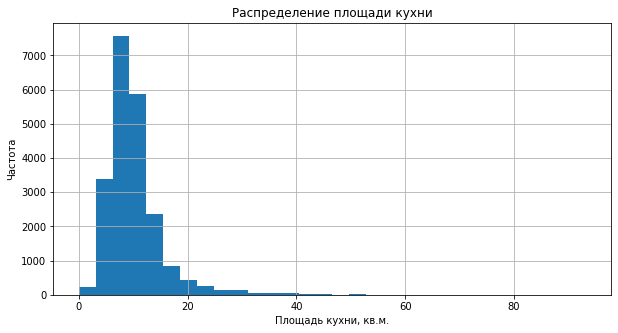

In [ ]:
df_good['kitchen_area'].hist(bins=30, figsize=(10,5))
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Частота')
plt.show()

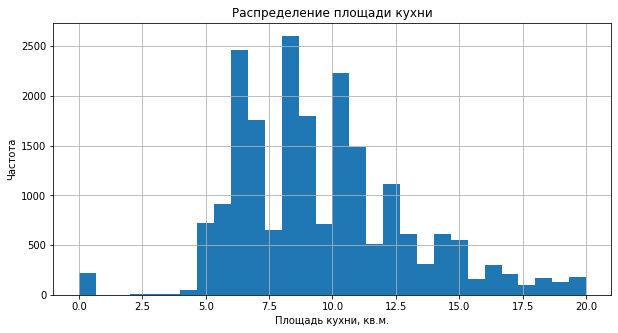

In [ ]:
# Немного увеличим масштаб, чтобы извлечь более точнуу информацию о распределении в промежутке от 0 до 20
df_good['kitchen_area'].hist(bins=30, range=(0,20), figsize=(10,5))
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Частота')
plt.show()

В большей части квартир площадь кухни составляет 6-12 кв.м., редко встречаются кухни больше 20 кв.м. или меньше 5.

In [ ]:
# Цена
# Переведём стоимость в млн.р.
df_good['last_price'] = df_good['last_price']/1000000

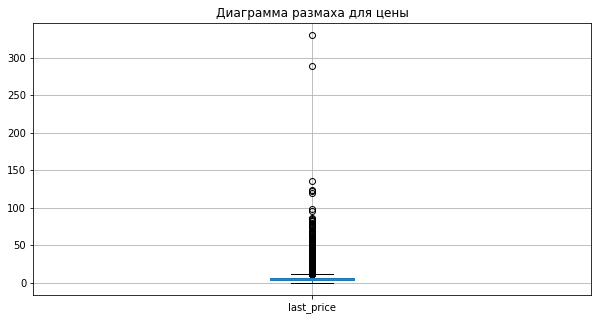

In [ ]:
df_good.boxplot('last_price', figsize=(10,5))
plt.title('Диаграмма размаха для цены')
plt.show()

На ящике в усами можно заметить несколько явно выраженных выброса: более 100 млн., оценим их долю от всего датасета:

In [ ]:
print('Доля квартир, цена которых превышает 100 млн: ',
      round(sum(df_good['last_price'] > 100)/(df_good['last_price'].count()), 4))

Доля квартир, цена которых превышает 100 млн:  0.0003


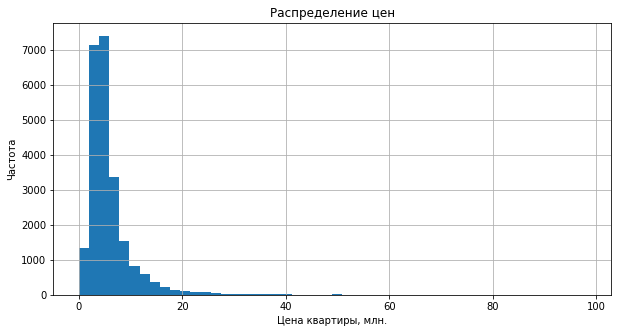

In [ ]:
df_good = df_good.query('last_price <= 100').reset_index(drop=True)
df_good.hist('last_price', bins=50, figsize=(10,5))
plt.title('Распределение цен')
plt.xlabel('Цена квартиры, млн.')
plt.ylabel('Частота')
plt.show()

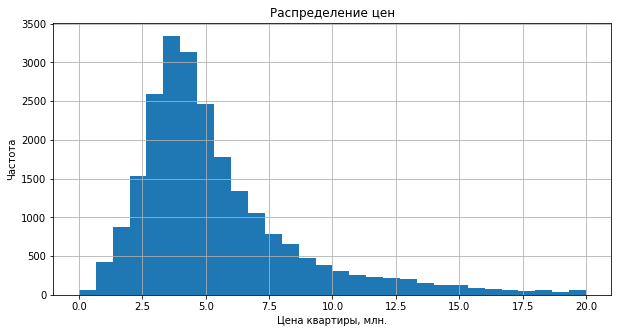

In [ ]:
df_good['last_price'].hist(bins=30, range=(0, 20), figsize=(10,5))
plt.title('Распределение цен')
plt.xlabel('Цена квартиры, млн.')
plt.ylabel('Частота')
plt.show()

In [ ]:
df_good['last_price'].describe()

count    23460.000000
mean         5.981153
std          5.348958
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max         98.000000
Name: last_price, dtype: float64

Цены большей части квартир находятся в диапазоне от 2,5 млн. до 6 млн., средняя цена сосотавляет 5,98 млн, медианная - 4,6 млн.

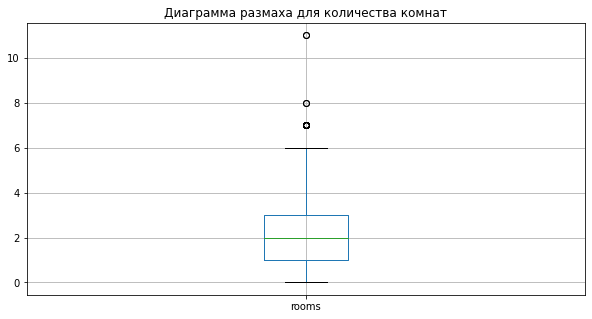

In [ ]:
# Количество комнат
df_good.boxplot('rooms', figsize=(10,5))
plt.title('Диаграмма размаха для количества комнат')
plt.show()

In [ ]:
print('Доля квартир, в которых более 6 комнат:',
      round(sum(df_good['rooms'] > 6)/(df_good['rooms'].count()), 4))

Доля квартир, в которых более 6 комнат: 0.001


Так как в текущем датафрейме лишь 0.1% квартир имеют более 6 комнат, можем исключить их из дальнейшего рассмотрения.

In [ ]:
df_good = df_good.query('rooms <= 6').reset_index(drop=True)

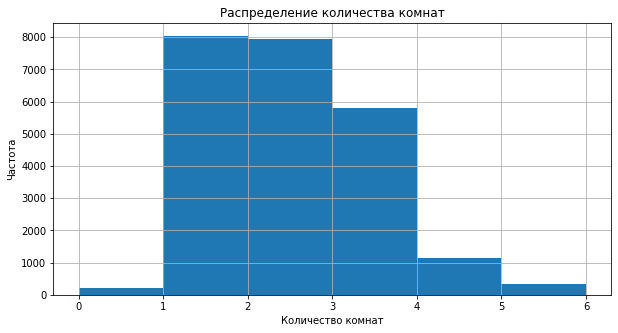

In [ ]:
df_good.hist('rooms', bins=6, figsize=(10,5))
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()


Большая часть объявлений - однокомнатные и двухкомнатные квартиры. Выделим студии и квартиры с открытой планировкой в отдельную группу и в качестве количества комнат укажем для них 0.

In [ ]:
df_good.loc[(df_good['studio'] == True) | (df_good['open_plan'] == True), 'rooms'] = 0

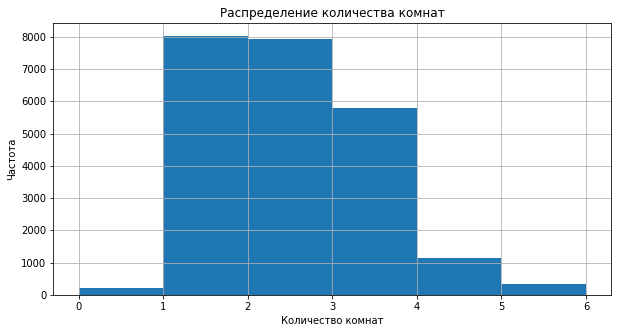

In [ ]:
# Построим гистограмму повторно
df_good.hist('rooms', bins=6, figsize=(10,5))
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

Большая часть квартир - однокомнатные и двухкомнатные, далее трёхкомнатные.

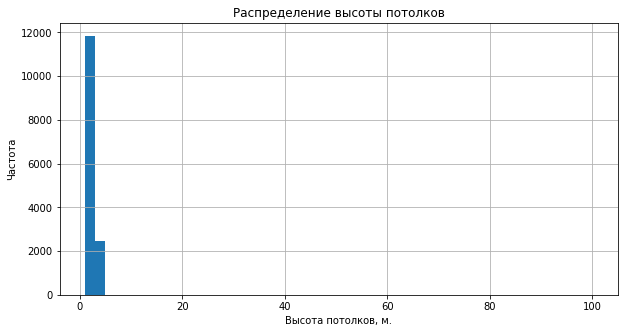

In [ ]:
# Высота потолков
df_good['ceiling_height'].hist(bins=50, figsize=(10,5))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Частота')
plt.show()

In [ ]:
df_good['ceiling_height'].describe()

count    14333.000000
mean         2.763888
std          1.265183
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Высота потолков выше 10 м. и максимальная высота в 100 м. вызывают сомнения. Вероятно, значения были уазаны некорректно - пропущены запятые.

In [ ]:
# Определим функцию для преобразования высоты потолков, превышающей 10 м, в коррекному виду
def correct_ceiling_height(height):
    if height > 10:
        return height / 10
    else:
        return height

# Применим функцию к столбцу
df_good['ceiling_height'] = df_good['ceiling_height'].apply(correct_ceiling_height)

Согласно нормам СНиП (строительные нормы и правила) и СП (своды правил), высота потолков должна быть не менее 2,5 м. Исключим наблюдения, не удовлетворяющих данному условию:

In [ ]:
df_good = df_good.query('ceiling_height >= 2.5 or ceiling_height.isna()').reset_index(drop=True)
df_good['ceiling_height'].describe()

count    14255.000000
mean         2.722392
std          0.283860
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

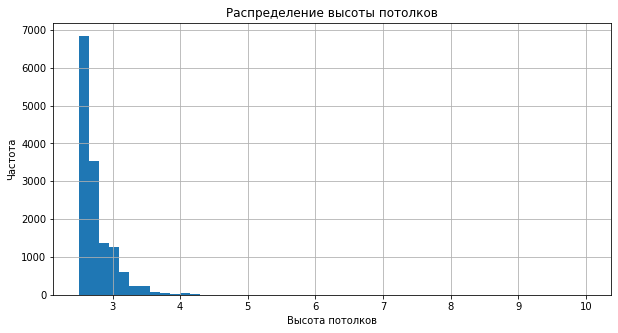

In [ ]:
df_good.hist('ceiling_height', bins=50, figsize=(10,5))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()

На промежутке, характеризующем квартиры, высота потолков в которых > 5 м., гистограмма практические сливается с 0. Оценим долю таких значений:

In [ ]:
print('Доля квартир с высотой потолков > 5:',
      round(sum(df_good['ceiling_height'] > 5)/(df_good['living_area'].count()), 4))

Доля квартир с высотой потолков > 5: 0.0004


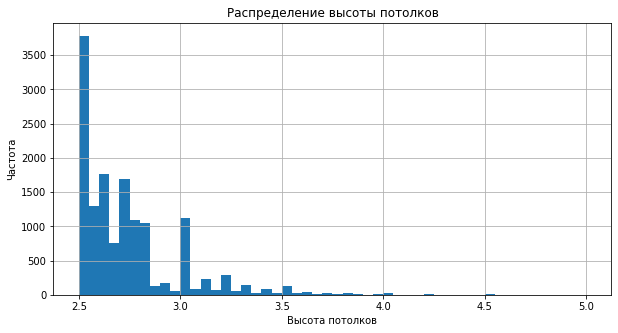

In [ ]:
df_good = df_good.query('ceiling_height <= 5 or ceiling_height.isna()').reset_index(drop=True)
df_good.hist('ceiling_height', bins=50, figsize=(10,5))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()

In [ ]:
df_good['ceiling_height'].value_counts().head(10)

2.50    3519
2.60    1646
2.70    1578
3.00    1094
2.80     989
2.55     979
2.75     909
2.65     676
3.20     268
3.10     199
Name: ceiling_height, dtype: int64

In [ ]:
df_good['ceiling_height'].describe()

count    14247.000000
mean         2.719787
std          0.259182
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

В большей части квартир высота потолков составляет 2,5 м., на втором месте - 2,6 м., далее 2,7 м. затем 2,8 и 3 м., потолки выше 3 м. встречаются редко. Средняя высота составляет 2,72, при этом в 50% квартир потолки ниже 2,65 м.

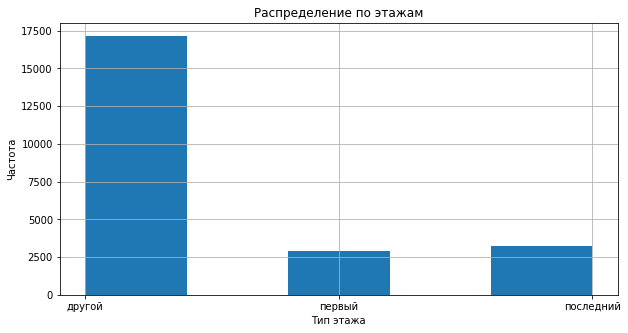

In [ ]:
# Тип этажа
df_good['floor_type'].hist(bins=5, figsize=(10,5))
plt.title('Распределение по этажам')
plt.xlabel('Тип этажа')
plt.ylabel('Частота')
plt.show()

In [ ]:
df_good['floor_type'].value_counts()/df_good['floor_type'].count()

другой       0.737279
последний    0.138946
первый       0.123775
Name: floor_type, dtype: float64

На первом этаже (12,4%) располагается на 1,5% меньше квартир, чем на последнем (13,9%), но большая часть (73,7%) располагается не на крайних этажах.

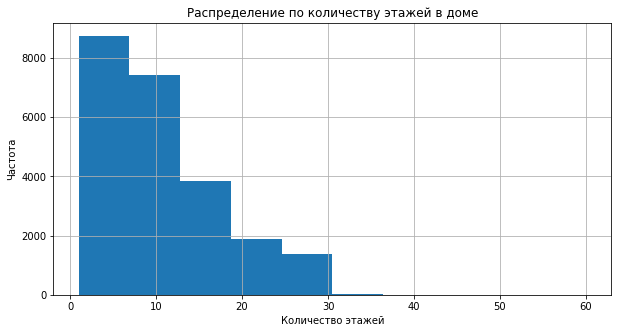

In [ ]:
# Количество этажей в доме
df_good['floors_total'].hist(bins = 10, figsize=(10,5))
plt.title('Распределение по количеству этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()

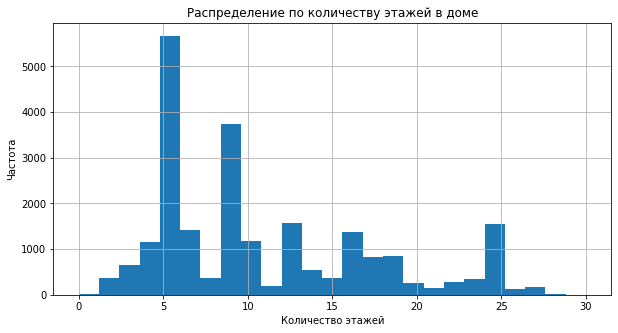

In [ ]:
df_good['floors_total'].hist(bins=25, range=(0,30), figsize=(10,5))
plt.title('Распределение по количеству этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()

Большая часть домов - пятиэтажные (что характерно для Санкт-Петербурга), на втором месте девятиэтажные дома.  

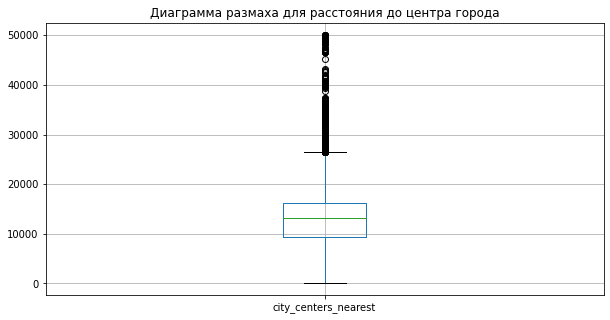

In [ ]:
# Расстояние до центра города в метрах
df_good.query('city_centers_nearest < 50000').boxplot('city_centers_nearest', figsize=(10,5))
plt.title('Диаграмма размаха для расстояния до центра города')
plt.show()

Выбросы на диаграмме визуально можно разделить на несколько групп. Уместно предположить, что это данные по квартирам, находящимся в определенных населенных пунктах в Ленинградской области. Построим гистограмму:

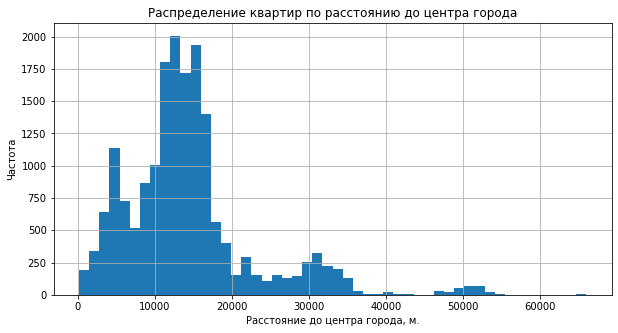

In [ ]:
df_good['city_centers_nearest'].hist(bins=50, figsize=(10,5))
plt.title('Распределение квартир по расстоянию до центра города')
plt.xlabel('Расстояние до центра города, м.')
plt.ylabel('Частота')
plt.show()

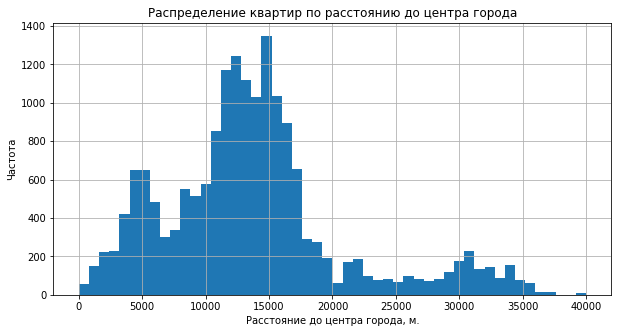

In [ ]:
df_good['city_centers_nearest'].hist(bins=50, range=(0,40000), figsize=(10,5))
plt.title('Распределение квартир по расстоянию до центра города')
plt.xlabel('Расстояние до центра города, м.')
plt.ylabel('Частота')
plt.show()

Чаще всего квартиры располагаются в 10-16 км. от центра города. Выглядит правдоподобно поскольку спальные районы Санкт-Петербурга, которые в последние годы активно застраиваются большими ЖК, находятся примерно на таком удалении от центра. Большое количество квартир в этих районах обусловлено относительно невысокими ценами на недвижимость.

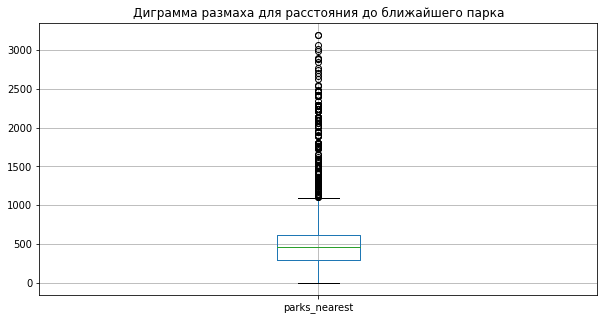

In [ ]:
# Расстояние до ближайшего парка
df_good.boxplot('parks_nearest', figsize=(10,5))
plt.title('Диграмма размаха для расстояния до ближайшего парка')
plt.show()

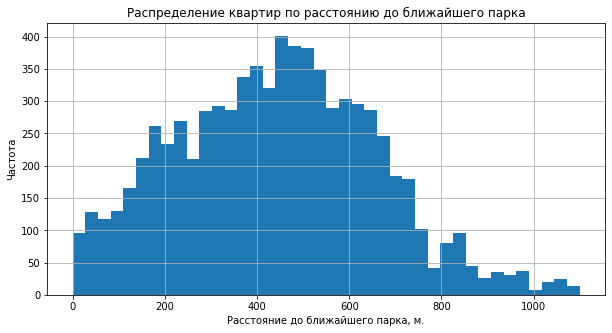

In [ ]:
df_good['parks_nearest'].hist(bins=40, range=(0,1100), figsize=(10,5), grid=True)
plt.title('Распределение квартир по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м.')
plt.ylabel('Частота')
plt.show()

In [ ]:
df_good.query('parks_nearest <= 1100')['parks_nearest'].describe()

count    7557.000000
mean      440.962816
std       216.220119
min         1.000000
25%       281.000000
50%       441.000000
75%       592.000000
max      1098.000000
Name: parks_nearest, dtype: float64

У большей части квартир ближайший парк находится в 400-550 метрах, среднее расстояние до парка 441,65 м,, а медианное 444 м. Однако по данному признаку в датасете содержится существенное количество пропущенных значений:

In [ ]:
print('Доля пропущенных значений в parks_nearest:',
      round(sum(df_good['parks_nearest'].isna())/len(df_good),3))

Доля пропущенных значений в parks_nearest: 0.663


Так как пропусков больше, чем имеющихся значений, результаты анализа по расстоянию до ближайшего парка могут быть искажены. Для получения более достоверного результата требуется дополнительная информация.

In [ ]:
print(f'Выборка без аномальных значений составляет {round(df_good.shape[0] / df.shape[0], 3)} от исходного набора данных')

Выборка без аномальных значений составляет 0.985 от исходного набора данных


# Время продажи квартиры

In [ ]:
df_good['days_exposition'].describe()

count    20246.000000
mean       179.814778
std        218.539730
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Стандартное отклонение существенно больше среднего значение, при этом среднее почти в два раза больше медианы.  
Можно предположить, что распределение имеет длинный хвост и смещенно влево.

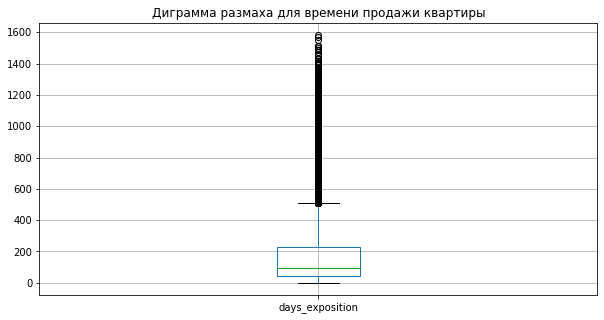

In [ ]:
df_good.boxplot('days_exposition', figsize=(10,5))
plt.title('Диграмма размаха для времени продажи квартиры')
plt.show()

На диаграмме размаха можно заметить значительное количество аномальных значений (больше 500-600 дней) и смещённость диаграммы к 0.

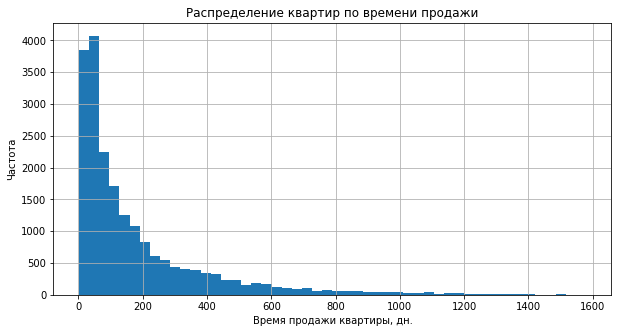

In [ ]:
df_good['days_exposition'].hist(bins=50, figsize=(10,5), grid=True)
plt.title('Распределение квартир по времени продажи')
plt.xlabel('Время продажи квартиры, дн.')
plt.ylabel('Частота')
plt.show()

Как и предполагалось, распределение имеет длинный хвост и сильно смещенно влево. Можно заметить, что основная масса квартир продаётся в течение 2 лет, при этом большая часть в первые 3-4 месяца. Продажа квартиры редко занимает более 800 дней, а после 1 200 гистограмма почти сливается с осью.
Прежде чем отбросить значения, проверим - какую долю от всех наблюдений они составляют:

In [ ]:
print('Доля квартир, проданных более чем за 800 дней:',
      round(sum(df_good['days_exposition'] > 800)/
       (df_good['days_exposition'].count()), 3))

Доля квартир, проданных более чем за 800 дней: 0.028


Так как процент таких квартир невелик, можно считать продажи длительностью более 800 дней необычно долгими.

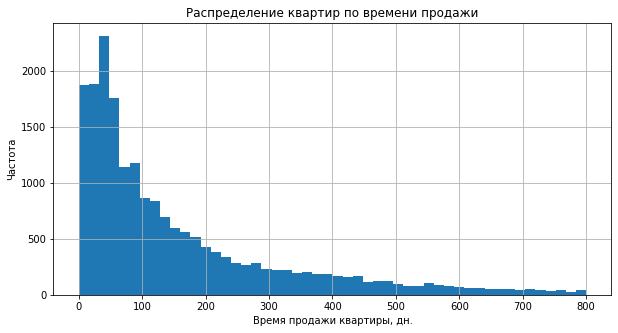

In [ ]:
# Рассмотрим интервал до 500 дней
df_good['days_exposition'].hist(bins=50, range=(0,800), figsize=(10,5), grid=True)
plt.title('Распределение квартир по времени продажи')
plt.xlabel('Время продажи квартиры, дн.')
plt.ylabel('Частота')
plt.show()

По гистограмме выше можно сделать следующий вывод: большая часть квартир продается в срок до 100 дней.

Чтобы определить, какие продажи можно считать быстрыми, рассмотрим интервал от 0 до 30 дней:

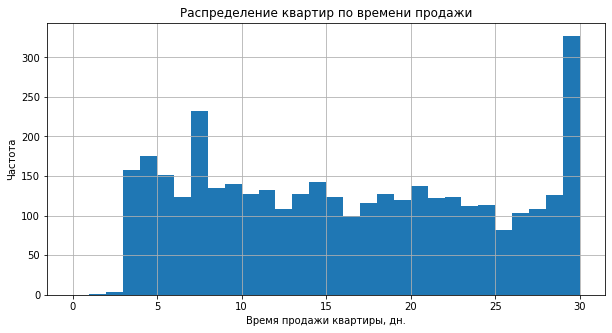

In [ ]:
df_good['days_exposition'].hist(bins=30, range=(0,30), figsize=(10,5), grid=True)
plt.title('Распределение квартир по времени продажи')
plt.xlabel('Время продажи квартиры, дн.')
plt.ylabel('Частота')
plt.show()

In [ ]:
df_good.query('days_exposition < 10')['days_exposition'].value_counts()

7.0    232
4.0    175
3.0    158
5.0    151
9.0    140
8.0    135
6.0    123
2.0      3
1.0      1
Name: days_exposition, dtype: int64

Лишь 2 квартиры были проданы в первые два дня с момента публикации объявления, поэтому такие продажи можно считать аномально быстрыми.

In [ ]:
print('Среднее значение до исключения аномальных значений:', round(df['days_exposition'].mean(),2))
print('Медиана до исключения аномальных значений:', round(df['days_exposition'].median(), 2))
print()
print('Среднее значение после исключения аномальных значений:', round(df_good.query('days_exposition > 2 and days_exposition <= 800')['days_exposition'].mean(), 2))
print('Медиана после исключения аномальных значений:', round(df_good.query('days_exposition > 2 and days_exposition <= 800')['days_exposition'].median(), 2))

Среднее значение до исключения аномальных значений: 180.89
Медиана до исключения аномальных значений: 95.0

Среднее значение после исключения аномальных значений: 155.37
Медиана после исключения аномальных значений: 91.0


Так как распределение сильно смещено, целесообразнее опираться на медианное значение, чем на среднее. 50% квартир продаются в срок до 91 дня.

# Промежуточный вывод

В данных было обнаружено большое количество выбросов по рассматриваемым признакам, в основном аномальные значения были присущи большим квартирам (общей площадью более 200 кв.м. и имеющим более 6 комнат). Также, встречались выбросы, причиной которых могут служить ошибки при заполнении, например, высота потолков от 10 до 100 м. (предположительно, высота в таким случаях была указала не в метрах или были пропущены запятые).  
Большая часть квартир имеет общую площадь от 30 до 60 кв.м. с жилой площадью от 15 до 35 кв.м. и площадью кухни от 5 до 15 кв.м., стандартное количество комнат - 1, 2 и 3, а высота потолков от 2,5 до 3. Расположены квартиры в основном не на первом и последнем этажах, а между ними, в пяти- и девятиэтажных домах. Чаще всего квартиры находятся в 10-16 км. от центра города, а стоимость составляет от 3 до 6 млн.р.  
Покупают квартиры чаще всего в течение 3-4 месяцев, однако срок продажи может достигать и 2 лет, при этом лишь для 3% квартир потребовалось больше времени для продажи.

# Определение факторов, которые больше всего влияют на стоимость объекта.

In [ ]:
# Для удобства выделим численные признаки, необходимые для построения корреляционной матрицы
df_numeric = df_good[['last_price',
                      'total_area',
                      'living_area',
                      'kitchen_area']]

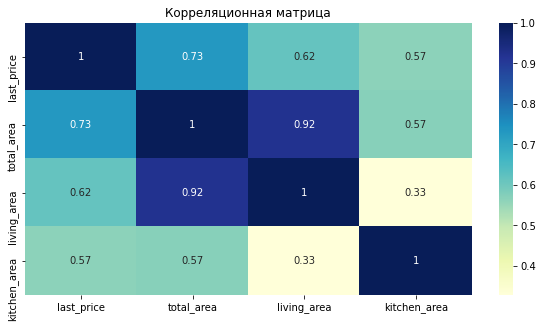

In [ ]:
# Строим коррелограмму
plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(),
            annot=True,
            cmap='YlGnBu')
plt.title('Корреляционная матрица')
plt.show()

Полная стоимость квартиры наиболее тесно связана с общей площадью, теснота связи цены с жилой площадью - средняя, как и с площадью кухни.

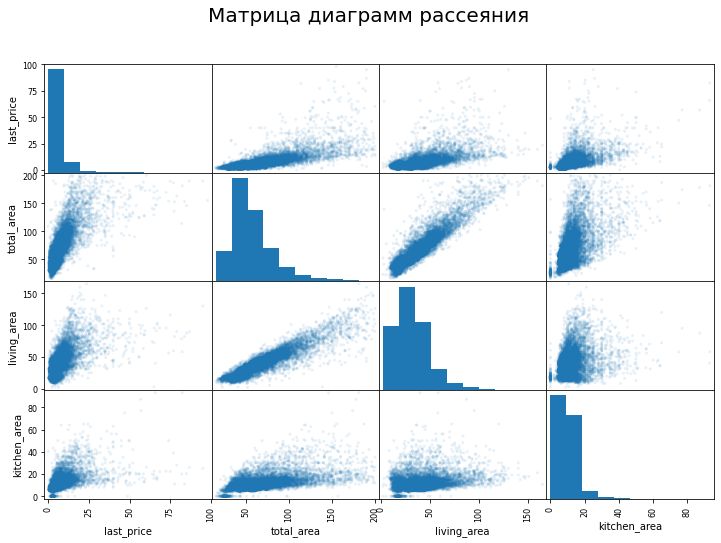

In [ ]:
# Диаграмма рассеяния
pd.plotting.scatter_matrix(df_numeric, figsize=(12,8), alpha=0.1)
plt.suptitle('Матрица диаграмм рассеяния', fontsize=20)
plt.show()

Как и предполагалось, зависимость между ценой и общей площадью квартиры наиболее ярко выражена, связь прямая - при увеличении площади квартиры растёт и цена. Связь цены с жилой площадью и площадью кухни также положительна, однако для квартир стоимостью выше 10-15 млн. зависимость не прослеживается. Можно предположить, что на стоимость квартир в этом ценовом сегменте оказывают влияние другие факторы.

In [ ]:
# Определим функцию для построения графиков зависимости цены от категориальных переменных
def categorial_features(df, column):
  (
      df.groupby(column)['last_price']
      .agg(['mean', 'median'])
      .plot(kind='bar', figsize=(10,5),
            grid=True)
  )

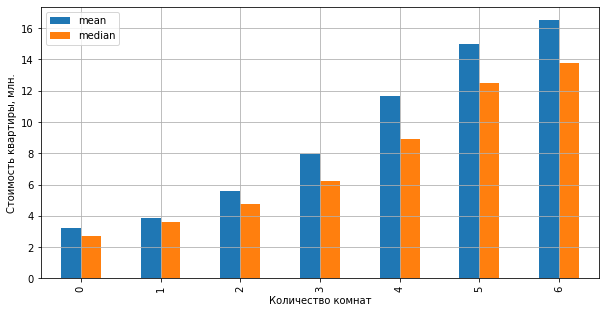

In [ ]:
# Количество комнат
categorial_features(df_good, 'rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры, млн.')
plt.show()

Прослеживается явная зависимость цены квартиры от количества комнат, связь прямая - с увеличением количества комнат растёт цена квартиры (как средняя, так и медианная).

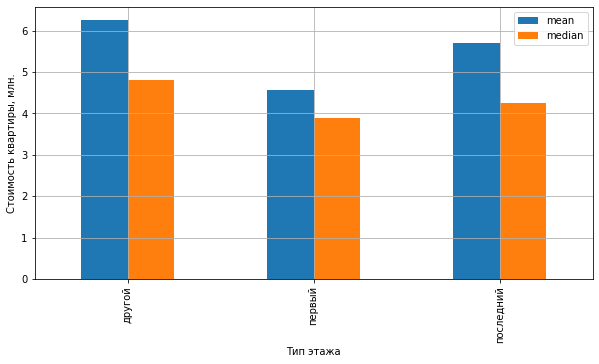

In [ ]:
# Тип этажа
categorial_features(df_good, 'floor_type')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартиры, млн.')
plt.show()

Прослеживается явная зависимость цены квартиры от количества комнат, связь прямая - с увеличением количества комнат растёт цена квартиры (как средняя, так и медианная).

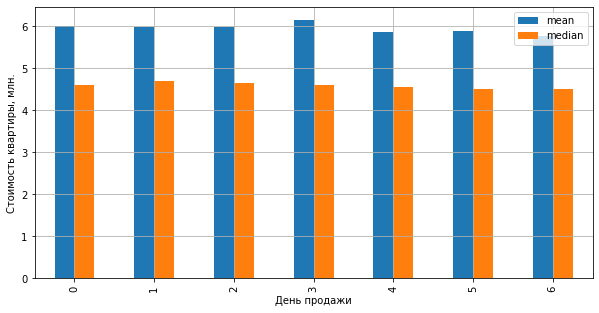

In [ ]:
# День продажи
categorial_features(df_good, 'day_exposition')
plt.xlabel('День продажи')
plt.ylabel('Стоимость квартиры, млн.')
plt.show()

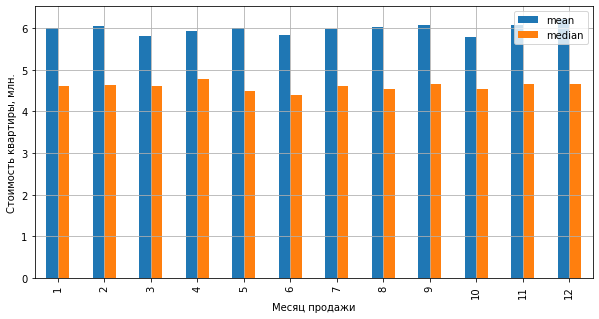

In [ ]:
# Месяц продажи
categorial_features(df_good, 'month_exposition')
plt.xlabel('Месяц продажи')
plt.ylabel('Стоимость квартиры, млн.')
plt.show()

В зависимости от дня и месяца публикации объявлений цены на квартиры не отличаются, зависимость не обнаружена.

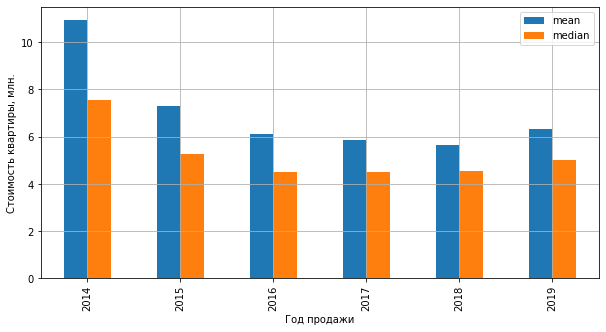

In [ ]:
# Год продажи
categorial_features(df_good, 'year_exposition')
plt.xlabel('Год продажи')
plt.ylabel('Стоимость квартиры, млн.')
plt.show()

В 2015 году наблюдалось существенное снижение как средней, так и медианной стоимости квартиры, на протяжении следующих 4 лет цена оставалась сравнительно стабильной. Явной зависимости не обнаружено.

# Промежуточный вывод

Наиболее сильное влияние на стоимость квартиры оказывают такие факторы как общая площадь и количетсво комнат: чем больше площадь, тем дороже квартира, аналогично и с числом комнат. Также, можно отметить, что квартиры на первом этаже стоят меньше, чем на прочих. Зависимости между ценой квартиры и днём/месяцем/годом публикации обнаружено не было.

# Cредняя цена 1 кв.м. в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
# Группируем по населённым пунктам
# Считаем для каждой локации количество объявлений
# Сортируем в порядке убывания
# Выбираем 10 локаций с наибольшим количеством объявлений
localities = df_good.groupby('locality_name')\
           ['total_area'].agg('count')\
           .sort_values(ascending=False)\
           .head(10)

In [ ]:
# Извлекаем индексы и преобразуем в список
localities = localities.index.to_list()

In [ ]:
# Отбираем строки с интересующими населёнными пунктами
# Группируем по локации и считаем среднюю цену за 1 кв.м.
# Сортируем в порядке убывания
df_good.query('locality_name in @localities')\
       .pivot_table(values='price_m2', index='locality_name')\
       .sort_values(by='price_m2', ascending=False)

,price_m2
locality_name,
Санкт-Петербург,113138.253929
Пушкин,103144.822579
Кудрово,95326.179139
Парголово,90362.345200
Мурино,86087.512050
Шушары,78677.364217
Колпино,75352.475583
Гатчина,68746.146763
Всеволожск,68719.320400


Самая дорогая недвижимость (в расчете на 1 кв.м.) в Санкт-Петербурге (113 138 р.), Пушкине (103 148 р.) и Кудрово (95 326 р.), а самая дешёвая в Гатчине (68 746 р.), Всеволожске (68 719 р.) и Выборге (58 238 р.)

#  Cредняя стоимость квартир в Санкт-Петербурге на разном удалении от центра.

In [ ]:
spb = df_good[df_good['locality_name'] == 'Санкт-Петербург']\
      .pivot_table(values='last_price', index='city_centers_nearest_km')
spb

,last_price
city_centers_nearest_km,
0.0,23.521922
1.0,12.748257
2.0,13.207467
3.0,10.171587
4.0,10.855322
5.0,11.522801
6.0,11.955439
7.0,13.357248
8.0,8.941860


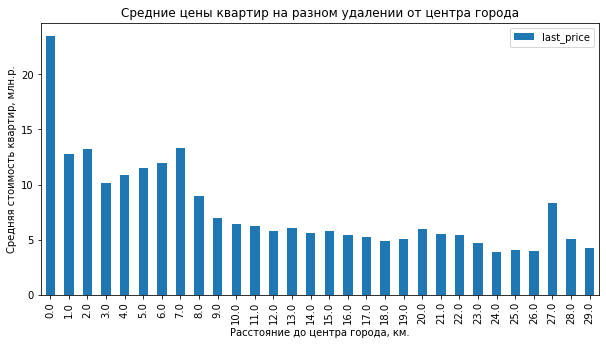

In [ ]:
spb.plot(kind='bar', figsize=(10,5))
plt.title('Средние цены квартир на разном удалении от центра города')
plt.xlabel('Расстояние до центра города, км.')
plt.ylabel('Средняя стоимость квартир, млн.р.')
plt.show()

Самая высокая средняя стоимость у квартир, находящихся в центре города (менее 1 км.), она составляет до 25  млн.  

Цена квартир в 1-7 км. от центра колеблется в промежутке от 10 до 15 млн.

Квартиры, расположенные в 8 км. и более, продаются в среднем по цене от 4 до 10 млн.  

Чем квартира ближе к центру, тем она дороже, однако есть пик в 27 км., проверим квартиры, находящиеся на этом расстоянии:

In [ ]:
df_good.loc[(df_good['city_centers_nearest_km'] == 27) &(df_good['locality_name'] == 'Санкт-Петербург'),\
            ['last_price',
            'locality_name',
            'total_area',
            'rooms',
            'ceiling_height',
            'city_centers_nearest_km']]\
            .sort_values(by='last_price', ascending=False)

,last_price,locality_name,total_area,rooms,ceiling_height,city_centers_nearest_km
735,14.35,Санкт-Петербург,74.0,2,3.13,27.0
5859,2.25,Санкт-Петербург,32.0,1,NaN,27.0


Пик в 27 км. от центра города обусловлен наличием двухкомнатной квартиры стоимостью 14,35 млн. и площадью 74 кв.м.

### Общий вывод

В ходе работы были предобработаны данные: устранены дубликаты, восстановленны пропуски там, где это возможно и удалены аномальные значения. Затем был проведён исследовательский анализ данных, результаты которого показали, что:  
- Большая часть квартир имеет общую площадь от 30 до 60 кв.м., при этом площадь 50% квартир не превышает 52 кв.м.
- В основном продаются однокомнатные и двухкомнатные квартиры, следующие по распространенности - трехкомнатные.  
- Жилая площадь чаще всего составляет от 15 до 35 кв.м., а площадь кухни от 5 до 15 кв.м.
- Большая часть квартир расположена в пятиэтажных домах, вследующие по популярности - девятиэтажные, затем шестнадцатиэтажные дома. Квартиры на первом этаже дешевле, чем на остальных.
- Стоимость квартир составляет от 2,5 млн. до 6 млн. для Санкт-Петербурга и Ленинградской области. Если же рассматривать отдельно Петербург - стоимость квартир в центре может составлять вплоть до 25 млн.р., а в радиусе более 10 км. - в среднем от 4 до 7 млн.
- Квартиры в основном расположены в 10-16 км. от центра города.  
- Самая дорогая недвижимость (в расчете на 1 кв.м.) в Санкт-Петербурге (113,1 тыс.р.), Пушкине (103,15 тыс.р.) и Кудрово (95,3 тыс.р.), а самая дешёвая в Гатчине (68,75 тыс.р.), Всеволожске (68,7 тыс.р.) и Выборге (58,2 тыс.р.)
- По большей части квартиры покупают в первые 3-4 месяца, но продажа может занять и до 2 лет.
- На стоимость квартиры оказывают влияние общая площадь и количетсво комнат: чем больше площадь, тем дороже квартира, аналогично с числом комнат.

При этом в исходном наборе данных были выявлены следующие проблемы:  
- Высокая доля пропущенных значений в признаках, заполняемых автоматически из геосервисов. Причиной могли послужить технические неполадки, недостаток информации о точном расположении квартиры.  
- Признаки, характеризующие количество этажей в доме и наименование населённого пункта, также содержат пропуски. Так как эти поля заполняли пользователи, они могли просто пропустить их. Возможно, имеет смысл сделать поля обязательными для заполнения.
- Некорректные значения высоты потолков (до 100 м.), возможная причина - человеческий фактор, некорретные единицы измерения или пропущенная запятая. Можно определить допустимые границы для этого показателя, и, если пользователь укажет значение, выходящее за эти рамки, оповестить его о необходимости проверить корректность.  
- Существенное количество выбросов, по большей части обусловленное наличием в датасете аномально больших (от 200 до 900 кв.м.) и дорогих (от 20 до 120 млн.) квартир. Целесообразно выделить эти квартиры в другую выборку и анализировать отдельно, поскольку в данном ценовом сегменте на стоимость квартиры могут оказывать влияние другие факторы, нежели для низкого или среднего сегмента. Также, эти данные смещают распределение и препятсвуют достоверной оценке характеристик.  

Помимо этого, интересно было бы взглянуть на данные о станциях метро, вблизи которых расположены квартиры, а также расстояние до ближайшей станции, поскольку эти факторы могут оказывать влияние на стоимость жилья.